In [1]:
import tensorflow as tf

(x_full, y_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(x_full,y_full,test_size=0.2,random_state=13)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(x_full, y_full, test_size=0.2, random_state=13)

In [9]:
print(f'Train shape: {X_train.shape}, Test shape: {x_test.shape}, validation shape: {X_valid.shape}')

Train shape: (48000, 28, 28), Test shape: (10000, 28, 28), validation shape: (12000, 28, 28)


In [10]:
print(y_train[:10])

[1 3 8 9 4 0 3 2 3 5]


In [12]:
import numpy as np

unique_classes = np.unique(y_train)
print(unique_classes)
print(f'Total class count is {len(unique_classes)}.')

[0 1 2 3 4 5 6 7 8 9]
Total class count is 10.


# Visualize dataset

In [13]:
import matplotlib.pyplot as plt
import numpy as np

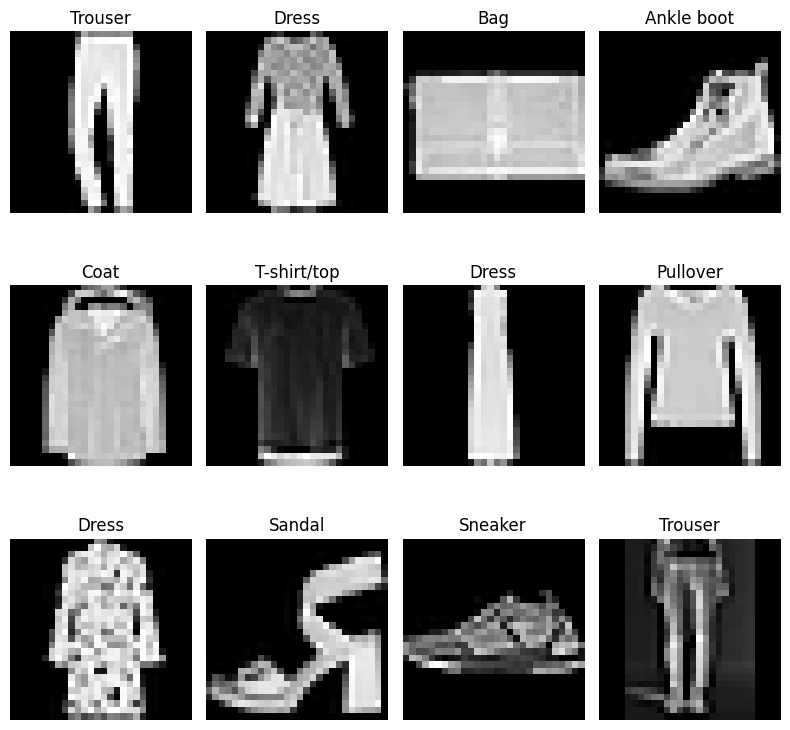

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

plt.figure(figsize=(8,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    label = class_names[y_train[i]]
    plt.title(label)
plt.tight_layout()
plt.show()

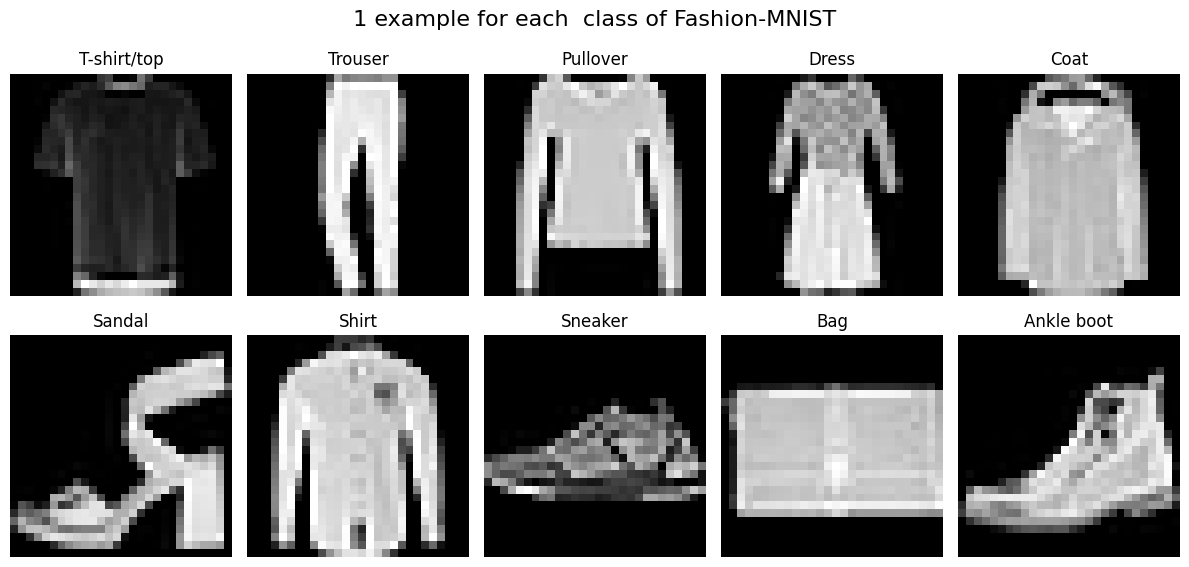

In [17]:
plt.figure(figsize=(12,6))
for label_num in range(10):
    idx = np.where(y_train == label_num)[0][0]
    plt.subplot(2,5,label_num+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(class_names[label_num])
    plt.axis('off')
plt.suptitle(" 1 example for each  class of Fashion-MNIST ", fontsize=16)
plt.tight_layout()
plt.show()

# data preprocessing

In [ ]:
#Fashion-MNIST images have pixel values in the range 0–255. To optimize training in dense layers,
#it is necessary to scale these values to the 0–1 range.


#Normalize

# X_train = X_train / 255.0
# X_valid = X_valid / 255.0
# x_test = x_test / 255.0


#Dense layers accept 1D input vectors, but currently the images have a shape of (28, 28).
#Therefore, you need to reshape the images into 1D vectors before feeding them into the dense layers.
#Reshape

# X_train = X_train.reshape(-1, 28*28)   # (48000, 784)
# X_valid = X_valid.reshape(-1, 28*28)   # (12000, 784)
# x_test = x_test.reshape(-1, 28*28)     # (10000, 784)

# make model

In [18]:
model=tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(shape=(28, 28)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300,activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50,activation="relu", kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,nesterov=True),
              metrics=["accuracy"])

model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7541 - loss: 0.7120 - val_accuracy: 0.8367 - val_loss: 0.4454
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8328 - loss: 0.4710 - val_accuracy: 0.8494 - val_loss: 0.4118
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8478 - loss: 0.4280 - val_accuracy: 0.8619 - val_loss: 0.3785
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8530 - loss: 0.4067 - val_accuracy: 0.8584 - val_loss: 0.3835
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8617 - loss: 0.3861 - val_accuracy: 0.8594 - val_loss: 0.3888


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,022 (2.08 MB)

 Trainable params: 272,060 (1.04 MB)

 Non-trainable params: 900 (3.52 KB)

 Optimizer params: 272,062 (1.04 MB)

In [20]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8511 - loss: 0.4037


[0.4198935627937317, 0.847100019454956]

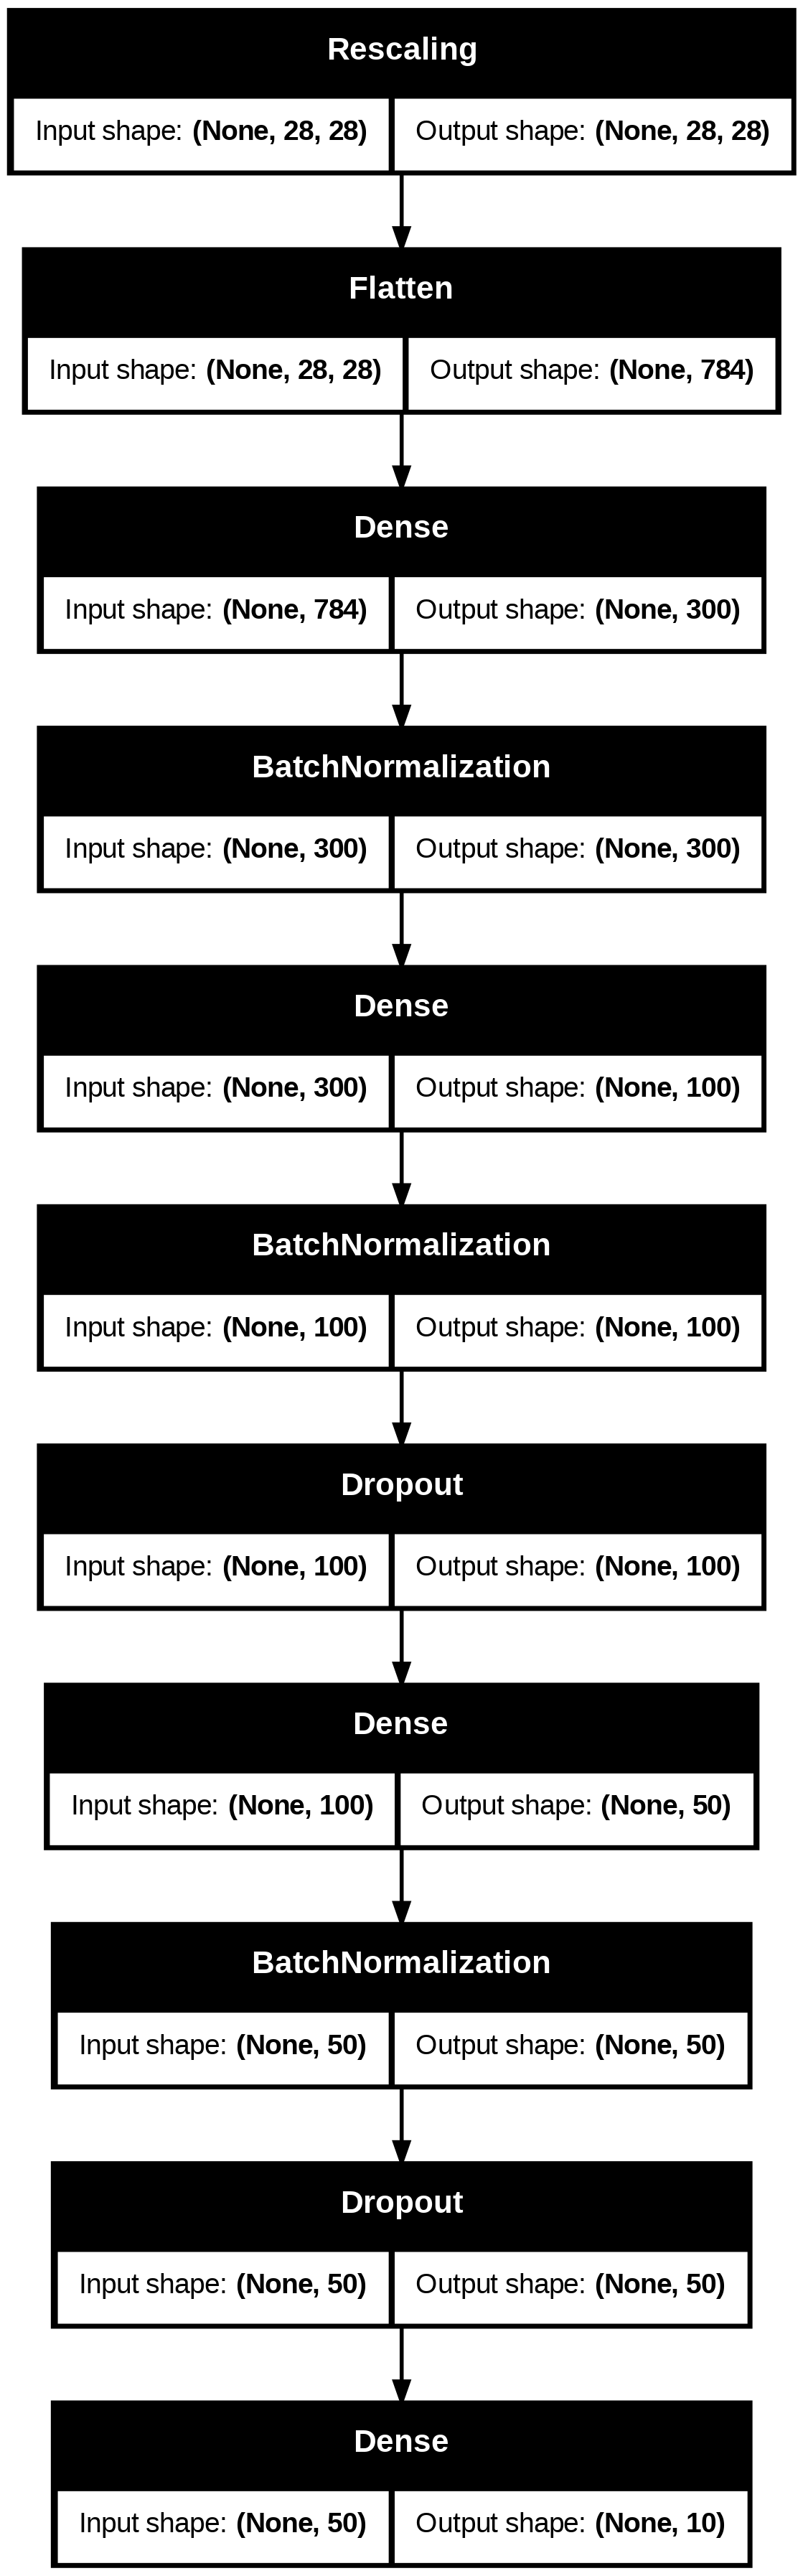

In [21]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
#Extra kod


# normalizer = tf.keras.layers.Normalization(axis=-1)
# normalizer.adapt(X_train)

# model = tf.keras.Sequential([
#     normalizer,
#     tf.keras.layers.Flatten(input_shape=(28,28)),
#     tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])


# Error analysis

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


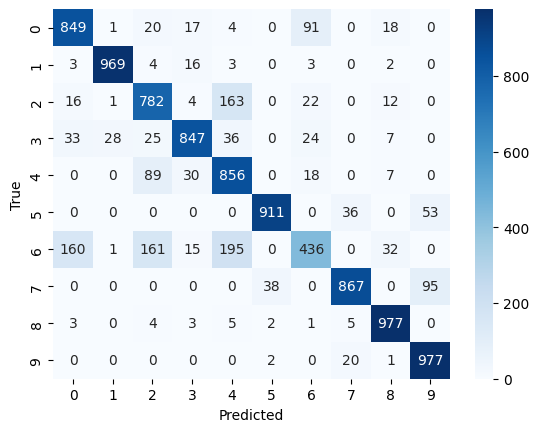

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.85      0.82      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.72      0.78      0.75      1000
       Dress       0.91      0.85      0.88      1000
        Coat       0.68      0.86      0.76      1000
      Sandal       0.96      0.91      0.93      1000
       Shirt       0.73      0.44      0.55      1000
     Sneaker       0.93      0.87      0.90      1000
         Bag       0.93      0.98      0.95      1000
  Ankle boot       0.87      0.98      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, y_pred_classes, target_names=class_names))